# Predicting vigilance using machine learning
## Random Forest Model 2
Rosalie Lucas (6540384)

This is the second model in my thesis Predicting vigilance using machine learning.
In this model subjective measures and demographic data will be used.
These are consistent within one participant and therefor could be over represented.

In [163]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [164]:
data_file_path = '/Users/roos/Data/all_trials_noNaN.csv'
data_file = pd.read_csv(data_file_path)
data_2 = data_file[[ 'Age', 'Gender', 'PSQI', 'MEQ_type', 'results']]


In [165]:
# Encode categorical variables
# Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_2['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_2['Gender'])
data_2['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_2['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_2['MEQ_type'])
data_2['MEQ_type'] = code_MEQ


gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


In [166]:
# plot = sns.pairplot(data_2, hue='results', palette="Set1")

In [167]:
for column in data_2:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_2[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_2.isnull().sum())

The number of values for feature Age : 7 -- [19 21 22 23 26 50 59]
The number of values for feature Gender : 2 -- [0 1]
The number of values for feature PSQI : 5 -- [0.28571429 0.42857143 0.57142857 0.71428571 1.2       ]
The number of values for feature MEQ_type : 3 -- [0 1 2]
The number of values for feature results : 2 -- [0. 1.]
Age         0
Gender      0
PSQI        0
MEQ_type    0
results     0
dtype: int64


In [168]:
# Splitting the data
X = data_2.drop('results', axis=1).values
Y = data_2['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1719, 4)
Y shape: (1719,)


In [169]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, Y_train)
print(Y_test.sum()/len(Y_test))
print(Y_train.sum()/(len(Y_train)))

0.8023255813953488
0.7709090909090909


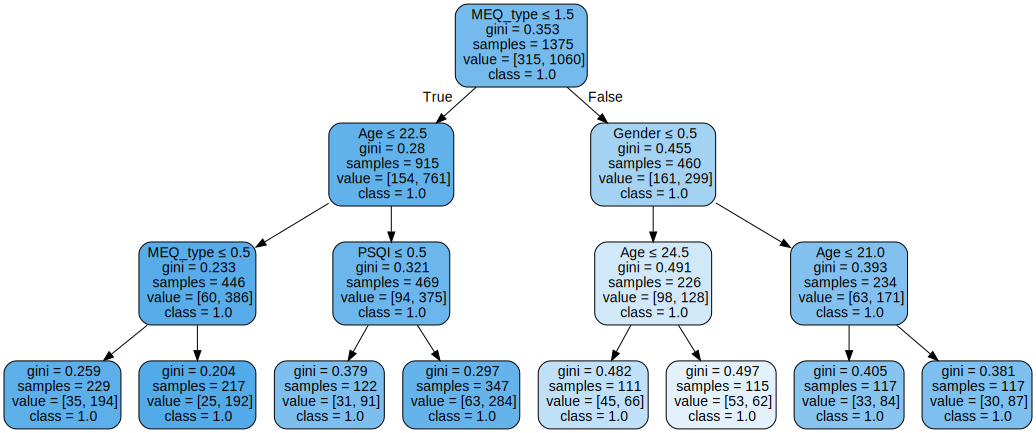

In [170]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_2.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('model2.gv', view=True)
graph

In [171]:
final = ''
fi = ''
for i, column in enumerate(data_2.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature Age:, 0.080
Importance of feature Gender:, 0.206
Importance of feature PSQI:, 0.032
Importance of feature MEQ_type:, 0.682


,index,Variable,Feature Importance Score
0,3,MEQ_type,0.681931
1,1,Gender,0.206448
2,0,Age,0.080060
3,2,PSQI,0.031561


In [172]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.7709090909090909
Testing Accuracy is:  0.8023255813953488


In [173]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=30)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  0.7709090909090909
Testing Accuracy is:  0.8023255813953488


In [174]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_2.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2


Importance of feature Age:, 0.257
Importance of feature Gender:, 0.095
Importance of feature PSQI:, 0.118
Importance of feature MEQ_type:, 0.529


,index,Variable,Feature Importance Score
0,3,MEQ_type,0.528917
1,0,Age,0.257306
2,2,PSQI,0.118354
3,1,Gender,0.095424
